This script does the binary classification on news articles about FLOOD (is about flood or Not). This classifier used the open source Glove pre-trained embedding words. This flood detection classifier is basically adopted from the work of Sie Huai Gan on Spam email detection; the orginal can be found here: https://towardsdatascience.com/spam-filtering-system-with-deep-learning-b8070b28f9e0 and https://github.com/huai99/Email-Spam-Detection-Python/blob/master/Email%20Spam%20(%20Medium%20Part%202).ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Download the glove embedding

!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-30 04:09:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-30 04:09:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-30 04:09:22--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!python -m gensim.scripts.glove2word2vec -i glove.6B.300d.txt -o glove.6B.300d.word2vec.txt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'gensim.scripts.glove2word2vec' found in sys.modules after import of package 'gensim.scripts', but prior to execution of 'gensim.scripts.glove2word2vec'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-06-30 04:12:35,457 - glove2word2vec - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/glove2word2vec.py -i glove.6B.300d.txt -o glove.6B.300d.word2vec.txt
2021-06-30 04:12:35,986 - glove2word2vec - INFO - converting 400000 vectors from glove.6B.300d.txt to glove.6B.300d.word2vec.txt
2021-06-30 04:12:57,202 - glove2word2vec - INFO - Converted model with 400000 vectors and 300 dimensions


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [ ]:
df1 = pd.read_csv('X_train.csv', encoding = "UTF-8")
df2 = pd.read_csv('y_train.csv')
df2['label'] = df2['category'].apply(lambda x: 1 if x=='flood' else 0)

In [ ]:
type(df1['body'])

pandas.core.series.Series

In [ ]:
y_train = (df2.pop('label')).to_numpy()
x_train = (df1.pop('body')).to_numpy()

In [ ]:
type(x_train[4])

str

In [ ]:
(x_train[3])

'Grand Pursuit\r\n\r\nThe Story of Economic Genius\r\n\r\nSylvia Nasar\r\n\r\nSimon & Schuster: 559 pp., $35\r\n\r\nAdvertisement\r\n\r\nToday’s economy may seem the bleakest in recent memory: plunging consumer confidence, slumping home prices, a stubbornly high unemployment rate. But as Sylvia Nasar reminds us in “Grand Pursuit: The Story of Economic Genius,” in 1933 a full 25% of the nation was out of work, suicides were rising sharply, and stocks were trading at one-fifth of their 1929 prices.\r\n\r\nThen, as now, public leaders struggled with solving the spiraling economic crisis. In 1934, President Franklin Delano Roosevelt met with John Maynard Keynes, a British economist known for his love of art, his taste in young men and his brilliant if controversial theories. He urged the president to spend more on stimulus programs to shake the country out of its stupor. At a New York dinner the next evening, Keynes told some of his colleagues that every dollar spent by the government — de

In [ ]:
df3 = pd.read_csv('X_test.csv', encoding = "UTF-8")
df4 = pd.read_csv('y_test.csv')
df4['label'] = df4['category'].apply(lambda x: 1 if x=='flood' else 0)

In [ ]:
y_test = (df4.pop('label')).to_numpy()
x_test = (df3.pop('body')).to_numpy()

In [ ]:
import unicodedata
import re
import string
from nltk.tokenize import word_tokenize



#remove hyperlink:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)


#change to lower case:
def to_lower(word):
    result = word.lower()
    return result


#remove punctuation
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

#remove whitespace
def remove_whitespace(word):
    result = word.strip()
    return result

#remove Number- Not sure if we need it!!
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

#remove newline:
def replace_newline(word):
    return word.replace('\n','')


def remove_accented_chars(word):
    word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return word





def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_accented_chars,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence


x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


x_train = [word_tokenize(o) for o in x_train]
x_test = [word_tokenize(o) for o in x_test]


def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result



def word_stemmer(words):
    return [stemmer.stem(o) for o in words]



def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]


def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_stemmer,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words


x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

In [ ]:
from gensim.models import KeyedVectors

w2v = KeyedVectors.load_word2vec_format('glove.6B.300d.word2vec.txt',binary=False)

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
maxlen = 100
max_features = 50000
EMBEDDING_FILE = 'glove.6B.300d.txt'
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)

In [ ]:
x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features = pad_sequences(x_train_features,maxlen=maxlen)
x_test_features = pad_sequences(x_test_features,maxlen=maxlen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
word_index = tokenizer.word_index
nb_words = max_features
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [ ]:
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          15000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 128)          140544    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17    

In [ ]:
model.layers[1].trainable = False

In [ ]:
history = model.fit(x_train_features,y_train, batch_size=50, epochs=20, validation_data=(x_test_features, y_test))

Epoch 1/20
3/3 [==============================] - 22s 566ms/step - loss: 0.7287 - accuracy: 0.5062 - val_loss: 0.6749 - val_accuracy: 0.5606
Epoch 2/20
3/3 [==============================] - 1s 226ms/step - loss: 0.6028 - accuracy: 0.7656 - val_loss: 0.6565 - val_accuracy: 0.6061
Epoch 3/20
3/3 [==============================] - 0s 170ms/step - loss: 0.5399 - accuracy: 0.8953 - val_loss: 0.6438 - val_accuracy: 0.6818
Epoch 4/20
3/3 [==============================] - 0s 172ms/step - loss: 0.4569 - accuracy: 0.9613 - val_loss: 0.6259 - val_accuracy: 0.6970
Epoch 5/20
3/3 [==============================] - 0s 170ms/step - loss: 0.4043 - accuracy: 0.9638 - val_loss: 0.6120 - val_accuracy: 0.7273
Epoch 6/20
3/3 [==============================] - 0s 173ms/step - loss: 0.3699 - accuracy: 0.9776 - val_loss: 0.5972 - val_accuracy: 0.7273
Epoch 7/20
3/3 [==============================] - 0s 171ms/step - loss: 0.3437 - accuracy: 0.9526 - val_loss: 0.5843 - val_accuracy: 0.7576
Epoch 8/20
3/3 [===

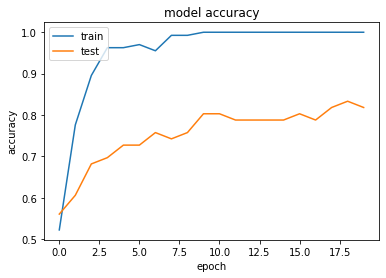

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [ ]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

In [ ]:
confusion_matrix(y_test,y_predict)

array([[26,  5],
       [ 7, 28]])

In [ ]:
f1_score(y_test,y_predict)

0.823529411764706

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[26  5]
 [ 7 28]]


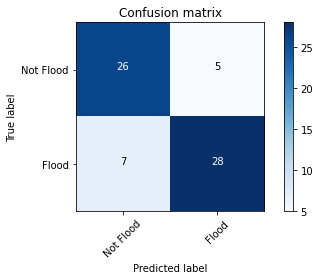

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Flood','Flood'], normalize=False,
                      title='Confusion matrix')